
 # Part II - (Ford GoBike System Data Analysis and Visualization)
## by (Olayiwola Idris)

## Investigation Overview

The goal of this project is to evaluate the gender distribution, user type and duration of trip in respect to member year of birth.

**What is/are the main feature(s) of interest in your dataset?**
- I will be checking the customer profile.
- What is the average duration of trips?
- Does weather(with regard to months or seasons) impact the trip duration?
- What is the impact or dependency of the above insights on whether a user is a subscriber or a customer?




## Dataset Overview
- The dataset initially consist of 183412 rows and 16 columns. It was later reduced to 174952  rows and 12 columms after wrangling while I concentrated on  Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender for visualization.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time
import requests
import pandas as pd
import math
from timeit import default_timer as timer

%matplotlib inline



In [2]:
# Import the fordgobike CSV file into a DataFrame
bikes = pd.read_csv('201902_fordgobike_tripdata.csv')


In [3]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.info())


(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
bikes.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bikes.keys()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
bikes_clean = bikes.copy()

In [7]:
#check number of missing values in each column
bikes_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**Check if there is duplicate rows inthe data set**

In [8]:
#check duplicate rows
sum(bikes_clean.duplicated())


0

No duplicate rows

**Checking number of missing values in each column**

In [9]:
#check number of missing values in each column
bikes_clean.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


**Remove all NaN/None values in the dataframe**


In [10]:
#remove all NaN values in the dataframe
bikes_clean.dropna(inplace=True)

**Changing member_birth_year, start_time, end_time datatype to datetime**


In [11]:
# Changing member_birth_year, start_time and end_time datatype to datetime
#bikes_clean.member_birth_year = pd.to_datetime(bikes_clean.member_birth_year)
bikes_clean.start_time = pd.to_datetime(bikes_clean.start_time)
bikes_clean.end_time = pd.to_datetime(bikes_clean.end_time)


**Checking the dataframe to confirm the cleaning of the data**

<b> Define
- Remove unuseful column

In [12]:
# Here, we perform various Data Cleaning operations like :
# 1. We drop 'NaN' values 
# 2. Remove various insignificant features

bikes_clean.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
bikes_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [13]:
bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [14]:
print(bikes_clean.shape)


(174952, 12)


In [15]:
bikes_clean.describe()


,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,111.648819,111.335635,1659.195937,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


**Trip based on member gender** <br>
- From the pie chart, it is observed that almost three-quater (74.6%) of the gender are male, while less than one-quater(23.3%) is female. Other occupies 2.1% of the distributuion. Also, it is observe that Male and female member birth year has major range between 1900, the female member birth year has an outlier in the year 1880 which shows that female were the initial subcriber of the trip.

Text(0, 0.5, '')

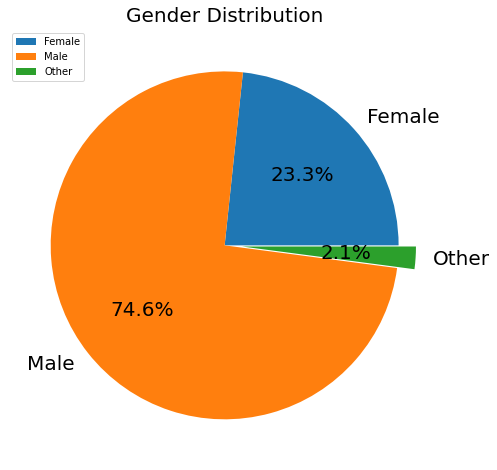

In [16]:
#Pie chart for Gender distribution

pie = bikes_clean.groupby('member_gender').count()[['bike_id']]
pie.rename(columns={'bike_id': 'member_gender'}, inplace=True)
pie['source_percentage'] = pie.member_gender / pie.member_gender.sum() * 100
pie['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%', explode=(0,0,0.1), fontsize=20)
plt.title("Gender Distribution", {'fontsize': 20})
plt.legend(["Female", "Male", "Other"])
plt.ylabel("")



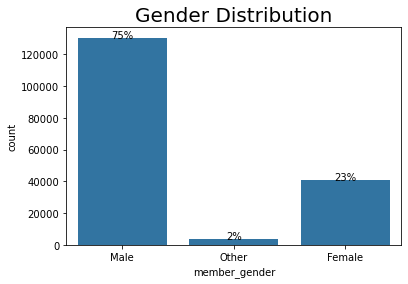

In [17]:
# create the plot 

base_color = sb.color_palette()[0]
sb.countplot(data = bikes_clean, x = 'member_gender', color = base_color)

# add annotations
n_points = bikes_clean.shape[0]
cat_counts = bikes_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title("Gender Distribution", {'fontsize': 20})


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.00f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

Text(0.5, 1.015, 'member_birth_year vs. member gender')

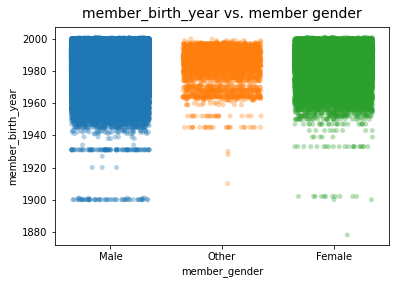

In [18]:
# create a numeric variable from the string 'member_age' 
# variable
bikes['member_birth_year'] = bikes.member_birth_year.astype(float)
# scatterplot (jittered) - age and gender
sb.stripplot(data = bikes, x = 'member_gender', y = 'member_birth_year',
           jitter = 0.35 , alpha =  1/3);
plt.title('member_birth_year vs. member gender', fontsize=14, y=1.015)

**Trip based on user Distribution**  <br>
- It is observed that (90.5%) of the users are subscriber, while (9.5%) are Customer which shows that the subsciber users are exponentially more than the customer users. we can see that both violinplot and boxplot shows the customer Member birth year less than 1965 are outliers while subscriber Member birth year less than 1960 are outliers. Also there has been customer user_type since 1880 while subscriber user_type started around 1900. This reveal that, customer user_type were first type of users before having subscriber users.

Text(0, 0.5, '')

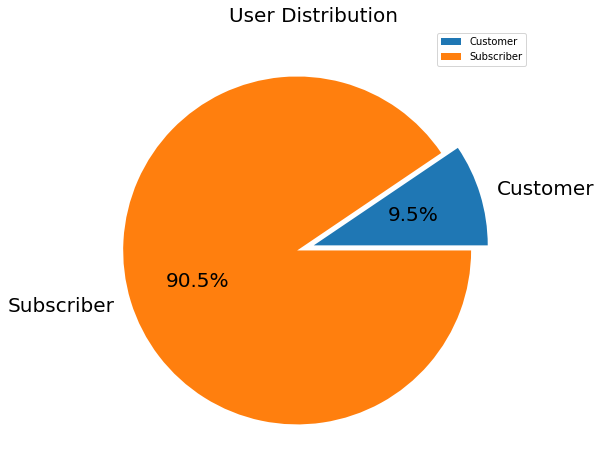

In [19]:
#Pie chart for Gender distribution
pie = bikes_clean.groupby('user_type').count()[['bike_id']]
pie.rename(columns={'bike_id': 'user_type'}, inplace=True)
pie['source_percentage'] = pie.user_type / pie.user_type.sum() * 100
pie['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%', explode=(0,0.1), fontsize=20)
plt.title("User Distribution", {'fontsize': 20})
plt.legend(["Customer", "Subscriber"])
plt.ylabel("")

Text(0.5, 1.015, 'User_type vs. member_birth_year')

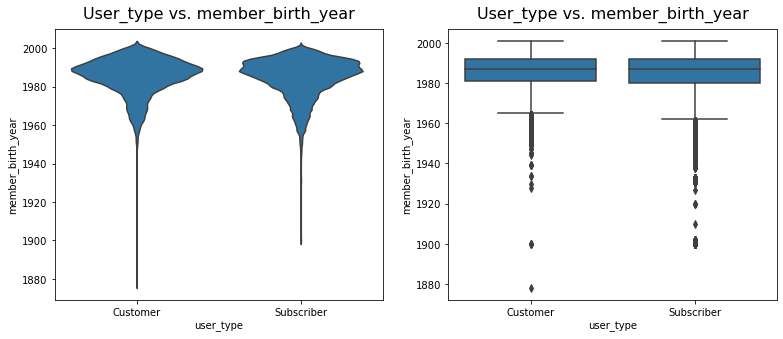

In [20]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('User_type vs. member_birth_year', fontsize=16, y=1.015)


# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=bikes, y='member_birth_year', x='user_type', inner = None,
              color = base_color)
plt.xticks(rotation = 0); # include label rotation due to small subplot size
plt.title('User_type vs. member_birth_year', fontsize=16, y=1.015)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=bikes, y='member_birth_year', x='user_type', color = base_color)
plt.xticks(rotation = 0);
plt.title('User_type vs. member_birth_year', fontsize=16, y=1.015)



**Distribution of trip durations** <br>
- It is observed that the distribution skewed right. with peaks around 308 seconds. Its only few people that uses up to 1000 secs as the frequency keep decreasing from around 2500 down to one. Also, in 1988 there was a peak in the number of trip


Text(0, 0.5, 'Frequency')

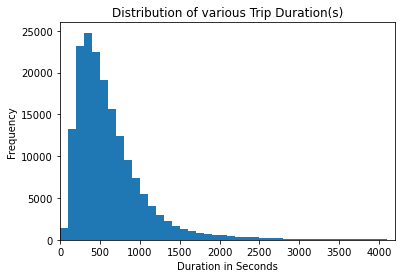

In [21]:
# Here we plot the distribution of trip durations.

binedges = np.arange(0, bikes_clean['duration_sec'].max() + 100 , 100)
plt.hist(data = bikes_clean , x = 'duration_sec' , bins = binedges)
plt.xlim(0,4200)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

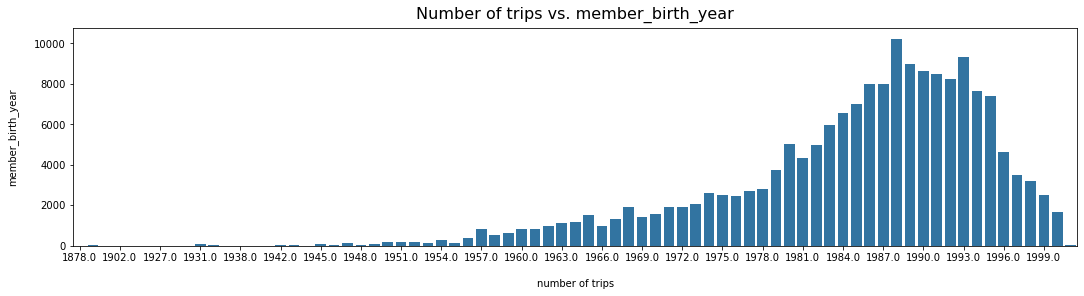

In [22]:
#'member_birth_year':['1881-1890', '1891-1990', '1901-1910','1911-1920','1921-1930', '1931-1940', '1941-1950', '1951-1960','1961-1970', '1971-1980', '1981-1990', '1991-2000']}

bikes["member_age_new"] = np.where(bikes["member_birth_year"] >= 100, 100,  bikes["member_birth_year"] )

# create the plot 
plt.figure(figsize = [18,4])
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_birth_year', color = base_color)


# add annotations
#n_points = bikes.shape[0]
#cat_counts = bikes['member_age'].value_counts()
#locs, labels = plt.xticks() # get the current tick locations and labels

# ensure that the labels are created:
plt.draw()
# get x tick labels and position
loc, label = plt.xticks()
# set the xticks for every second (original) xtick
plt.xticks(loc[::3],label[::3])   

plt.title('Number of trips vs. member_birth_year', fontsize=16, y=1.015)
plt.ylabel("member_birth_year", labelpad=16)
plt.xlabel('number of trips', labelpad=16)


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points) 

In [23]:
!jupyter nbconvert project_ford_GoBike_.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook project_ford_GoBike_.ipynb to slides
[NbConvertApp] Writing 782210 bytes to project_ford_GoBike_.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\itjar\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\itjar\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\itjar\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\itjar\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\itjar\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi